In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Latency  Experiments  

### #1 Experiment - End-to-end  Latency 
How long does it take a message we send to be delivered to the consumer?  <br>
For this test, we will create producer and consumer and repeatedly time how long it takes for a producer to send a message to the kafka cluster and then be received by our consumer 
#### Experimental setup:
System: stampede <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Kafa consumers: 1 <br>
Partitions: 1 <br>

In [31]:
latency = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/1_broker/kafka-latency_1_broker.csv', skipinitialspace=True) 
cols = ['Latency']
latency= latency[cols]
print 'Mesuared %d Messages' % latency.count()
latency_mean = latency.mean()
latency_std_error = latency.std() /latency.count()**(0.5)

Mesuared 220 Messages


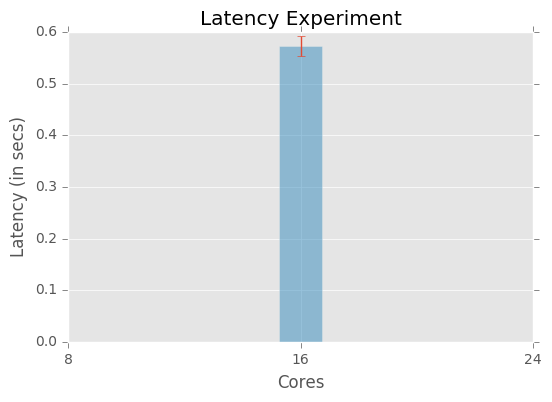

In [94]:
plt.bar(16,latency_mean, align='center',alpha=0.5,width=1.5, yerr=latency_std_error) 
plt.ylabel('Latency (in secs)')
plt.xlabel('Cores')
plt.xticks(np.array([8,16,24]))
plt.title("Latency Experiment")


### #2 Experiment - End-to-end weak Scaling  Latency 


In [110]:
# two brokers
latency_1 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/2_brokers/kafka-latency_2_brokers_1.csv', skipinitialspace=True) 
latency_2 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/2_brokers/kafka-latency_2_brokers_1.csv', skipinitialspace=True) 
frames = [latency_1,latency_2]
latency_2 = pd.concat(frames)
cols = ['Latency']
latency_2= latency[cols]
print 'Mesuared %d Messages using 2 brokers' % latency_2.count()
latency_mean_2 = latency_2.mean()
latency_std_error_2 = latency_2.std() /latency_2.count()**(0.5)

# three brokers
latency_1 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/3_brokers/kafka-latency_1_brokers.csv', skipinitialspace=True) 
latency_2 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/3_brokers/kafka-latency_2_brokers.csv', skipinitialspace=True) 
latency_3 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/3_brokers/kafka-latency_3_brokers.csv', skipinitialspace=True) 

frames = [latency_1,latency_2,latency_3]
latency_3 = pd.concat(frames)
cols = ['Latency']
latency_3= latency[cols]
print 'Mesuared %d Messages using 3 brokers' % latency_3.count()
latency_mean_3 = latency_3.mean()
latency_std_error_3 = latency_3.std() /latency_3.count()**(0.5)

Mesuared 2066 Messages using 2 brokers
Mesuared 2066 Messages using 3 brokers


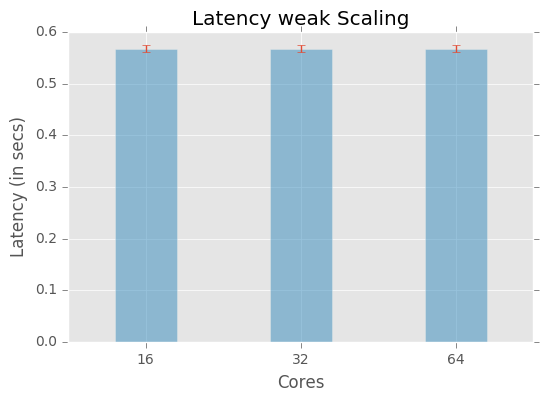

In [133]:
objects = ('16', '32', '64')
y_pos = np.arange(len(objects))

plot_latency = [latency_mean.values,latency_mean_2.values,latency_mean_3.values]
latency_error = [latency_std_error.values,latency_std_error_2.values,latency_std_error_3.values]
 
plt.bar(y_pos, plot_latency, align='center', alpha=0.5,width=0.4, yerr=latency_error)
plt.xticks(y_pos, objects)
plt.ylabel('Latency (in secs)')
plt.xlabel('Cores')
plt.title('Latency weak Scaling')